# Exploring OpenAI V1 functionality

On 11.06.23 OpenAI released a number of new features, and along with it bumped their Python SDK to 1.0.0. This notebook shows off the new features and how to use them with LangChain.

In [5]:
# need openai>=1.1.0, langchain>=0.0.332, langchain-experimental>=0.0.39
%pip install -U openai==1.1.0 langchain==0.0.333 langchain-experimental==0.0.39 --upgrade

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB 1.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/2.0 MB 1.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.0 MB 1.4 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/2.0 MB 1.7 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/2.0 MB 2.4 MB/s eta 0:00:01
   ----------------- ---------------------- 0.9/2.0 MB 3.1 MB/s eta 0:00:01
   ----------------------- ---------------- 1.1/2.0 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  2.0/2.0 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 4.9 MB/s eta 0:00:00
  Attempting uninstall: langchain
    Found existing installation: langchain 0.0.332
    Uninstalling langchain-0.0.332:
      Successfully uninstalled langchain-0.0.332
Note: you may need to restart the kernel to use updated packages.


In [1]:
from langchain.chat_models import ChatOpenAI
from langchain.schema.messages import HumanMessage, SystemMessage

## [Vision](https://platform.openai.com/docs/guides/vision)

OpenAI released multi-modal models, which can take a sequence of text and images as input.

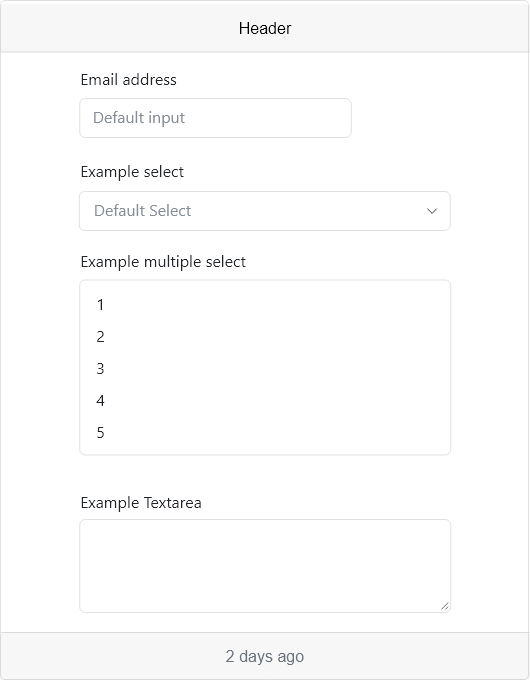

In [28]:
import base64
import requests

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
    
# Path to your image
image_path = "images/Card-form.png"

# Getting the base64 string
base64_image = encode_image(image_path)

# show image in notebook
from IPython.display import Image
Image(image_path)
#print(base64_image)

In [3]:
chat = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=4096, temperature=0.6)

In [6]:
chat.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "What is this image showing"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://raw.githubusercontent.com/langchain-ai/langchain/master/docs/static/img/langchain_stack.png",
                        "detail": "auto",
                    },
                },
            ]
        )
    ]
)

AIMessage(content='The image appears to be a diagram representing the architecture or components of a software system or framework related to language processing, possibly named "LangChain". The diagram is structured in layers, indicating different levels of the system, with each layer containing various modules or components.\n\nFrom bottom to top, the layers are labeled as follows:\n\n- Protocol: It includes components such as "LCEL", "Parallelization", "Fallbacks", "Tracing", "Batching", "Streaming", "Async", and "Composition". These are likely related to communication protocols and operational patterns within the system.\n  \n- Integrations Components: This layer consists of "Model I/O" with subcomponents like "Model", "Output Parser", "Prompt", and "Example Selector"; "Retrieval" with "Document Loader", "Retriever", "Embedding Model", "Vector Store", "Text Splitter"; and "Agent Tooling". These components seem to handle input/output operations, data retrieval, and tools for agents 

In [16]:


res = chat.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "What is this image showing"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                        "detail": "auto",
                    },
                },
            ]
        )
    ]
)

print(res)


content='The image appears to show a screenshot of a spreadsheet or a table with rows and columns. The first row consists of headers labeled "Head" repeated across several columns, and a leading column with a "#" sign, which typically stands for number or index. The subsequent rows are labeled with numbers 1 through 9 in the first column, indicating row numbers or items. Each cell under the headers contains the word "Cell," which likely indicates that this is a placeholder text or an example to illustrate the structure of a table. This type of layout is commonly used in applications like Microsoft Excel, Google Sheets, or other spreadsheet software for organizing and analyzing data.'


In [30]:
res = chat.invoke(
    [
        SystemMessage(
            content=[
                {"type": "text", "text": """You are a web developer. You are given an image and asked to create an html
                    page based on it. Be as accurate as possible to the image, even in the styles and colors. Use bootstrap framework v.5+ for generate the html. Use only cdn.jsdelivr.net for the scripts and do not use beta versions. 
                    Respond with html code only. Dont make comments in the response. Dont use markdown, only respond with html code"""},
            ]
        ),
        HumanMessage(
            content=[
                {"type": "text", "text": "Generate an html page based on this image."},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                        "detail": "auto",
                    },
                },
            ]
        )
    ]
)

# crea el html en un archivo con un nombre aleatorio y guardalo en el folder "html_files"
import os
from datetime import datetime
from random import randint

now = datetime.now()
timestamp = datetime.timestamp(now)
random_number = randint(0, 1000000)
filename = f"generated_html_files/{timestamp}_{random_number}.html"

# crea el archivo y escribe el contenido
f = open(filename, "w")
f.write(res.content.replace("```html", "").replace("```", ""))
f.close()

# abre el archivo en el browser
import webbrowser
webbrowser.open(f"file:///{os.getcwd()}/{filename}")


True

## [OpenAI assistants](https://platform.openai.com/docs/assistants/overview)

> The Assistants API allows you to build AI assistants within your own applications. An Assistant has instructions and can leverage models, tools, and knowledge to respond to user queries. The Assistants API currently supports three types of tools: Code Interpreter, Retrieval, and Function calling


You can interact with OpenAI Assistants using OpenAI tools or custom tools. When using exclusively OpenAI tools, you can just invoke the assistant directly and get final answers. When using custom tools, you can run the assistant and tool execution loop using the built-in AgentExecutor or easily write your own executor.

Below we show the different ways to interact with Assistants. As a simple example, let's build a math tutor that can write and run code.

### Using only OpenAI tools

In [ ]:
from langchain_experimental.openai_assistant import OpenAIAssistantRunnable

In [ ]:
interpreter_assistant = OpenAIAssistantRunnable.create_assistant(
    name="langchain assistant",
    instructions="You are a personal math tutor. Write and run code to answer math questions.",
    tools=[{"type": "code_interpreter"}],
    model="gpt-4-1106-preview",
)
output = interpreter_assistant.invoke({"content": "What's 10 - 4 raised to the 2.7"})
output

### As a LangChain agent with arbitrary tools

Now let's recreate this functionality using our own tools. For this example we'll use the [E2B sandbox runtime tool](https://e2b.dev/docs?ref=landing-page-get-started).

In [ ]:
!pip install e2b duckduckgo-search

In [ ]:
from langchain.tools import E2BDataAnalysisTool, DuckDuckGoSearchRun

tools = [E2BDataAnalysisTool(api_key="..."), DuckDuckGoSearchRun()]

In [ ]:
agent = OpenAIAssistantRunnable.create_assistant(
    name="langchain assistant e2b tool",
    instructions="You are a personal math tutor. Write and run code to answer math questions. You can also search the internet.",
    tools=tools,
    model="gpt-4-1106-preview",
    as_agent=True,
)

#### Using AgentExecutor

In [ ]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools)
agent_executor.invoke({"content": "What's the weather in SF today divided by 2.7"})

#### Custom execution

In [ ]:
agent = OpenAIAssistantRunnable.create_assistant(
    name="langchain assistant e2b tool",
    instructions="You are a personal math tutor. Write and run code to answer math questions.",
    tools=tools,
    model="gpt-4-1106-preview",
    as_agent=True,
)

In [ ]:
from langchain.schema.agent import AgentFinish


def execute_agent(agent, tools, input):
    tool_map = {tool.name: tool for tool in tools}
    response = agent.invoke(input)
    while not isinstance(response, AgentFinish):
        tool_outputs = []
        for action in response:
            tool_output = tool_map[action.tool].invoke(action.tool_input)
            print(action.tool, action.tool_input, tool_output, end="\n\n")
            tool_outputs.append(
                {"output": tool_output, "tool_call_id": action.tool_call_id}
            )
        response = agent.invoke(
            {
                "tool_outputs": tool_outputs,
                "run_id": action.run_id,
                "thread_id": action.thread_id,
            }
        )

    return response

In [ ]:
response = execute_agent(agent, tools, {"content": "What's 10 - 4 raised to the 2.7"})
print(response.return_values["output"])

In [ ]:
next_response = execute_agent(
    agent, tools, {"content": "now add 17.241", "thread_id": response.thread_id}
)
print(next_response.return_values["output"])

## [JSON mode](https://platform.openai.com/docs/guides/text-generation/json-mode)

Constrain the model to only generate valid JSON. Note that you must include a system message with instructions to use JSON for this mode to work.

Only works with certain models. 

In [ ]:
chat = ChatOpenAI(model="gpt-3.5-turbo-1106").bind(
    response_format={"type": "json_object"}
)

output = chat.invoke(
    [
        SystemMessage(
            content="Extract the 'name' and 'origin' of any companies mentioned in the following statement. Return a JSON list."
        ),
        HumanMessage(
            content="Google was founded in the USA, while Deepmind was founded in the UK"
        ),
    ]
)
print(output.content)

In [ ]:
import json

json.loads(output.content)

## [System fingerprint](https://platform.openai.com/docs/guides/text-generation/reproducible-outputs)

OpenAI sometimes changes model configurations in a way that impacts outputs. Whenever this happens, the system_fingerprint associated with a generation will change.

In [ ]:
chat = ChatOpenAI(model="gpt-3.5-turbo-1106")
output = chat.generate(
    [
        [
            SystemMessage(
                content="Extract the 'name' and 'origin' of any companies mentioned in the following statement. Return a JSON list."
            ),
            HumanMessage(
                content="Google was founded in the USA, while Deepmind was founded in the UK"
            ),
        ]
    ]
)
print(output.llm_output)

## Breaking changes to Azure classes

OpenAI V1 rewrote their clients and separated Azure and OpenAI clients. This has led to some changes in LangChain interfaces when using OpenAI V1.

BREAKING CHANGES:
- To use Azure embeddings with OpenAI V1, you'll need to use the new `AzureOpenAIEmbeddings` instead of the existing `OpenAIEmbeddings`. `OpenAIEmbeddings` continue to work when using Azure with `openai<1`.
```python
from langchain.embeddings import AzureOpenAIEmbeddings
```


RECOMMENDED CHANGES:
- When using AzureChatOpenAI, if passing in an Azure endpoint (eg https://example-resource.azure.openai.com/) this should be specified via the `azure_endpoint` parameter or the `AZURE_OPENAI_ENDPOINT`. We're maintaining backwards compatibility for now with specifying this via `openai_api_base`/`base_url` or env var `OPENAI_API_BASE` but this shouldn't be relied upon.
- When using Azure chat or embedding models, pass in API keys either via `openai_api_key` parameter or `AZURE_OPENAI_API_KEY` parameter. We're maintaining backwards compatibility for now with specifying this via `OPENAI_API_KEY` but this shouldn't be relied upon.